In [1]:
# https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import pandas as pd
# from pathlib import Path
# import os.path
# import numpy as np

In [14]:
# image_dir = Path('data')

In [16]:
# # Create file DataFrame
# filepaths = list(image_dir.glob(r'**/*.png'))
# filepaths

[]

In [4]:
# Build network
# Convolution, pooling, flattening, full connection 

In [22]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###  Convolution
The primary purpose of convolution is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

First three parameters refer to:

* Filters: The dimensionality of the output space (i.e. the number of output filters in the convolution). We will end up with a convolved feature matrix of 32x32.
* Kernel_size: Specifying the height and width of the 2D convolution window. It can be a tuple if we don't want a square.
* Strides: Specifying the strides of the convolution along with the height and width. It can be a tuple if we want a different height and width.
### Pooling
In the case of Max Pooling, we use the parameter pool_size to define a spatial neighborhood (in our case a 2×2 window) and take the largest element from the rectified feature map within that window.

### Flattening
We convert the matrix into a 1D array which can be the input of the final Neural Network.

### Full Connection
The full connection is connecting our convolutional network to a Neural Network that does final predictions.

### Step 4 - Data Augmentation
We need a lot of data to train a network but suppose we have a limited number of images for our network – what do we do? We don’t need to hunt for new images that can be added to our dataset. Why? Because neural networks aren’t smart, to begin with. For instance, a poorly trained neural network would think that the three tennis balls shown below are distinct, unique images.

So, to get more data, we just need to make alterations to our existing dataset – minor changes such as flips, translations, or rotations – and our neural network will think these are distinct images anyway. Data augmentation is a way of reducing overfitting of models, where we increase the amount of training data using only the information from our training data. The field of data augmentation is not new and, in fact, there are various data augmentation techniques for specific problems.



In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# We apply transformation to the images to extend our train and test samples.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Step 5 - Training

In [29]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 12s 246ms/step - loss: 0.5469 - accuracy: 0.7262 - val_loss: 0.6723 - val_accuracy: 0.6420
Epoch 2/10
50/50 [==============================] - 12s 244ms/step - loss: 0.5539 - accuracy: 0.7088 - val_loss: 0.5472 - val_accuracy: 0.7285
Epoch 3/10
50/50 [==============================] - 12s 242ms/step - loss: 0.5505 - accuracy: 0.7194 - val_loss: 0.5691 - val_accuracy: 0.7075
Epoch 4/10
50/50 [==============================] - 12s 234ms/step - loss: 0.5333 - accuracy: 0.7262 - val_loss: 0.5426 - val_accuracy: 0.7435
Epoch 5/10
50/50 [==============================] - 11s 232ms/step - loss: 0.5380 - accuracy: 0.7188 - val_loss: 0.5817 - val_accuracy: 0.7085
Epoch 6/10
50/50 [==============================] - 12s 238ms/step - loss: 0.5088 - accuracy: 0.7500 - val_loss: 0.5757 - val_accuracy: 0.7150
Epoch 7/10
50/50 [==============================] - 13s 267ms/step - loss: 0.5218 - accuracy: 0.7456 - val_loss: 0.5490 - val_accuracy: 0.7405

We changed the code slightly – we have changed the steps per epoch and the number of epochs. This reduces the quality of the model but, on the other hand, even those of us, who don't have a GPU in their computers will be able to finish the training withing a reasonable amount time.

With an increasing number of epochs, the accuracy will increase, too.

** Beware of overfitting with too many epochs

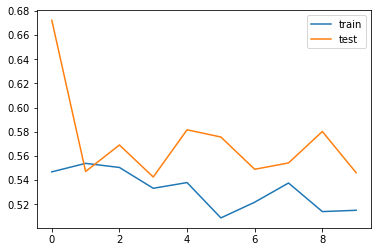

In [30]:
# We can check the graph to see how our loss was decreasing during the training.

from matplotlib import pyplot as plt

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

We can see that even though the loss of the training set goes down quite fast, it is not the case with the test set. That means that our model doesn't generalize very well on new data.

### Step 6 - Testing
Now, let's test a random image.

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image

# loading an image from the disk
test_image = image.load_img('data/random_dog.png', target_size = (64, 64))

# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)

# our cut-off
if result[0][0] >= 0.5: # this is probabilty
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


We can even try it with other images and see what it predicts. Now we can answer many interesting questions such as:

Does a tree look like a cat or a dog?
Do people look more like a cat or a dog?